In [1]:
from bs4 import BeautifulSoup as soup
from requests import get
my_url = "https://www.worldometers.info/coronavirus/"

pageHTML = get(my_url)


In [2]:
soup = soup(pageHTML.text) 

In [3]:
soup.text[:400]

'    Coronavirus Update (Live): 82,736 Cases and 2,817 Deaths from COVID-19 Wuhan China Virus Outbreak - Worldometer           $.extend( $.fn.dataTable.defaults, { responsive: true\n} );\t$(document).ready(function() { $(\'#example2\').dataTable( { "scrollCollapse": true,\t"sDom": \'<"bottom"flp><"clear">\', "paging": false } );\n} );$.extend( $.fn.dataTable.defaults, { responsive: true\n} );\t$(document).re'

In [4]:
data = []
table = soup.find('table')
table_body = table.find('tbody')

rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols) # Get rid of empty values
    

In [5]:
missingData = []
fixedData = [[]]
for row in data:
    for index,col in enumerate(row):
        if(col == ''):
            row[index] = 0
        
    missingData.append(row)


In [6]:
for row in missingData:
    if not (len(row)== 8):
        print('Missing Values')

In [7]:
headers = ["Country", "Total Cases", "New Cases", "Total Deaths","NewDeaths", "Total Recovered", "Critical", "Region"]

In [8]:
headers

['Country',
 'Total Cases',
 'New Cases',
 'Total Deaths',
 'NewDeaths',
 'Total Recovered',
 'Critical',
 'Region']

In [9]:
import pandas as pd
df = pd.DataFrame()

df =df.append(data)

df.columns = headers

In [10]:
df.to_csv('corona_countries.csv')

In [11]:
df_countries = pd.read_csv('lat_long.csv')


df_countries = df_countries.rename(columns={"name": "Country"})

In [12]:
df = df.set_index(['Country'], drop=True)
df_countries = df_countries.set_index('Country', drop=True)

display(df_countries.head())

,latitude,longitude
Country,,
Andorra,42.546245,1.601554
United Arab Emirates,23.424076,53.847818
Afghanistan,33.939110,67.709953
Antigua and Barbuda,17.060816,-61.796428
Anguilla,18.220554,-63.068615


In [13]:
df = df.merge(df_countries, on='Country')
df.head()

,Total Cases,New Cases,Total Deaths,NewDeaths,Total Recovered,Critical,Region,latitude,longitude
Country,,,,,,,,,
China,"78,514",+450,"2,747",+32,"32,954","8,346",Asia,35.861660,104.195397
Italy,650,+180,17,+5,45,35,Europe,41.871940,12.567380
Iran,245,+106,26,+7,54,0,Asia,32.427908,53.688046
Japan,207,+35,4,+1,32,13,Asia,36.204824,138.252924
Singapore,96,+3,0,0,66,7,Asia,1.352083,103.819836


In [14]:
df.to_csv('lat_long_corona.csv')

In [15]:


df = pd.read_csv('./lat_long_corona.csv')
display(df)

,Country,Total Cases,New Cases,Total Deaths,NewDeaths,Total Recovered,Critical,Region,latitude,longitude
0,China,"78,514",450,"2,747",32,"32,954","8,346",Asia,35.861660,104.195397
1,Italy,650,180,17,5,45,35,Europe,41.871940,12.567380
2,Iran,245,106,26,7,54,0,Asia,32.427908,53.688046
3,Japan,207,35,4,1,32,13,Asia,36.204824,138.252924
4,Singapore,96,3,0,0,66,7,Asia,1.352083,103.819836
5,Hong Kong,92,3,2,0,18,6,Asia,22.396428,114.109497
6,Kuwait,43,17,0,0,0,0,Asia,29.311660,47.481766
7,Germany,40,13,0,0,15,2,Europe,51.165691,10.451526
8,Thailand,40,0,0,0,22,2,Asia,15.870032,100.992541
9,Bahrain,33,0,0,0,0,0,Asia,25.930414,50.637772


In [16]:
def setRadius(count):
    count = count.replace(',', '')
    count = int(count)

    if(count == 0 ):
        return 0
    elif(count <50):
        return 2
    elif(count <100):
        return 4
    elif(count <200 ):
        return 6
    elif(count <300 ):
        return 8
    elif(count <400 ):
        return 10
    elif(count <500 ):
        return 12
    elif(count <600 ):
        return 14
    elif(count <700 ):
        return 16
    elif(count <800 ):
        return 18
    elif(count <1000 ):
        return 22
    elif(count <2000 ):
        return 28
    else:
        return 36



In [32]:
### plotting on map using folium
import folium

map = folium.Map(location=[30, 69], zoom_start=2, tiles='stamentoner')


data = df[["Country","Total Cases","latitude", "longitude", "Region", "New Cases", "NewDeaths"]].values



for item in data:
    [country,cases,latitude,longitude, region, newCases, newDeaths] = item
    popup = "\nTotal_Cases:{0}  \n New_Deaths:{1}\n New_Cases:{2}\n Country:{3}\n ".format(cases, newDeaths, newCases, country )

    radius = setRadius(cases)
    if(radius > 0):
        folium.CircleMarker(
            location=[ latitude, longitude],
            radius=radius,
            popup = popup,
            color='#EA3C53',
            fill=True

        ).add_to(map)





display(map)

In [33]:
### plotting on map using folium
import folium
map = folium.Map(location=[30, 69], zoom_start=2, tiles='stamentoner')

data = df[["Country","Total Deaths","latitude", "longitude", "Region", "New Cases", "NewDeaths"]].values

for item in data:
    [country,deaths,latitude , longitude , region, newCases, newDeaths] = item
    radius = setRadius(deaths)
    popup = "\nTotal_Deaths:{0}  \n New_Deaths:{1}\n New_Cases:{2}\n Country:{3}\n ".format(deaths, newDeaths, newCases, country )


    if(radius > 0):
        folium.CircleMarker(
            location=[ latitude, longitude],
            radius=radius,
            popup = popup,
            color='#EA3C53',
            fill=True

        ).add_to(map)





display(map)

In [36]:
### plotting on map using folium
import folium

map = folium.Map(location=[30, 69], zoom_start=2, tiles='stamentoner')

data = df[["Country","Total Recovered","latitude", "longitude", "Region", "New Cases", "NewDeaths"]].values

for item in data:
    [country,recovered ,latitude , longitude, region, newCases, newDeaths ] = item
    radius = setRadius(recovered)
    popup = "\nTotal_Recovered:{0}  \n New_Deaths:{1}\n New_Cases:{2}\n Country:{3}\n ".format(recovered, newDeaths, newCases, country )

    if(radius > 0):
        folium.CircleMarker(
            location=[ latitude, longitude],
            radius=radius,
            popup = popup,
            color='#7FFF00',
            fill=True
        ).add_to(map)




map.save('temp.html')

import os
import time
from selenium import webdriver

delay=5
fn='temp.html'
tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
map.save(fn)

browser = webdriver.Firefox()
browser.get(tmpurl)
#Give the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('totalRecovered.png')
browser.quit()




display(map)

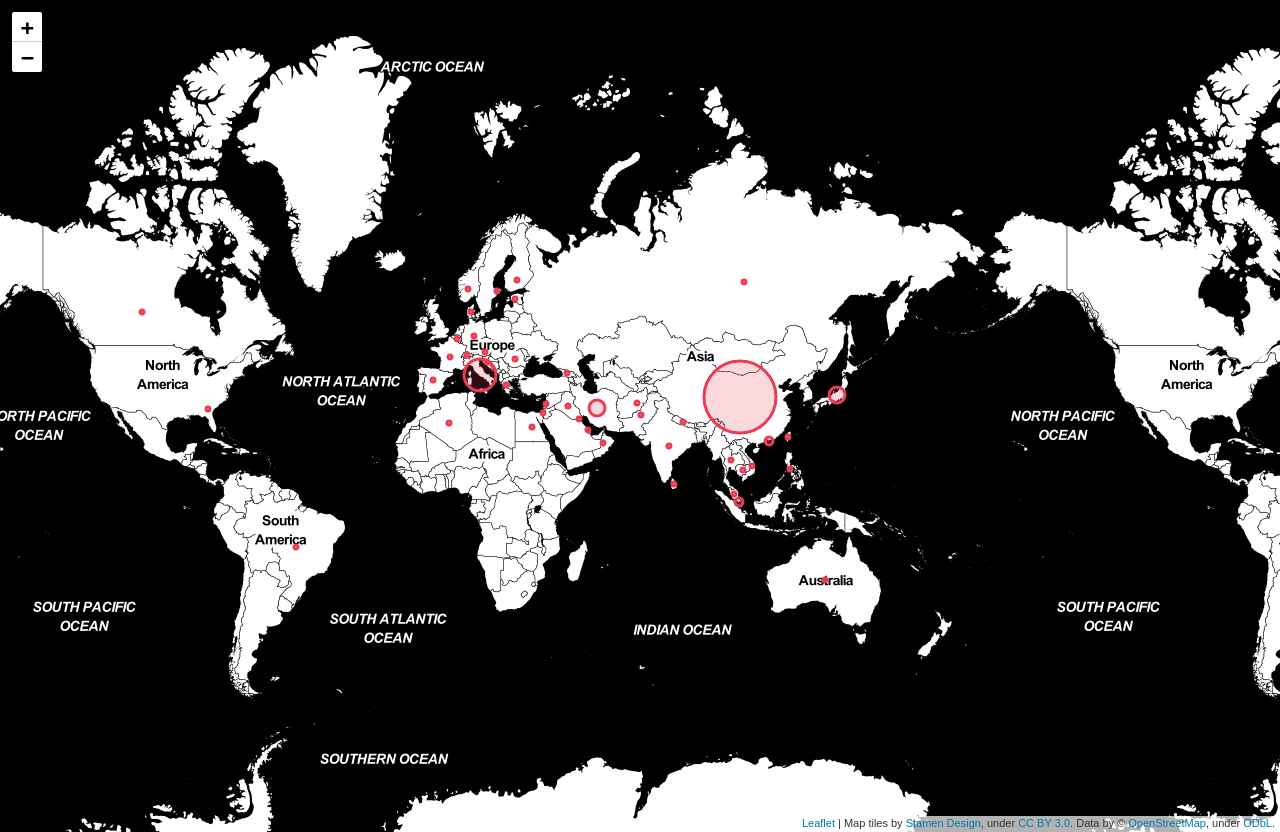

In [37]:
# Total Cases in the world of Coronavirus
from IPython.display import Image
Image("./totalCases.png")

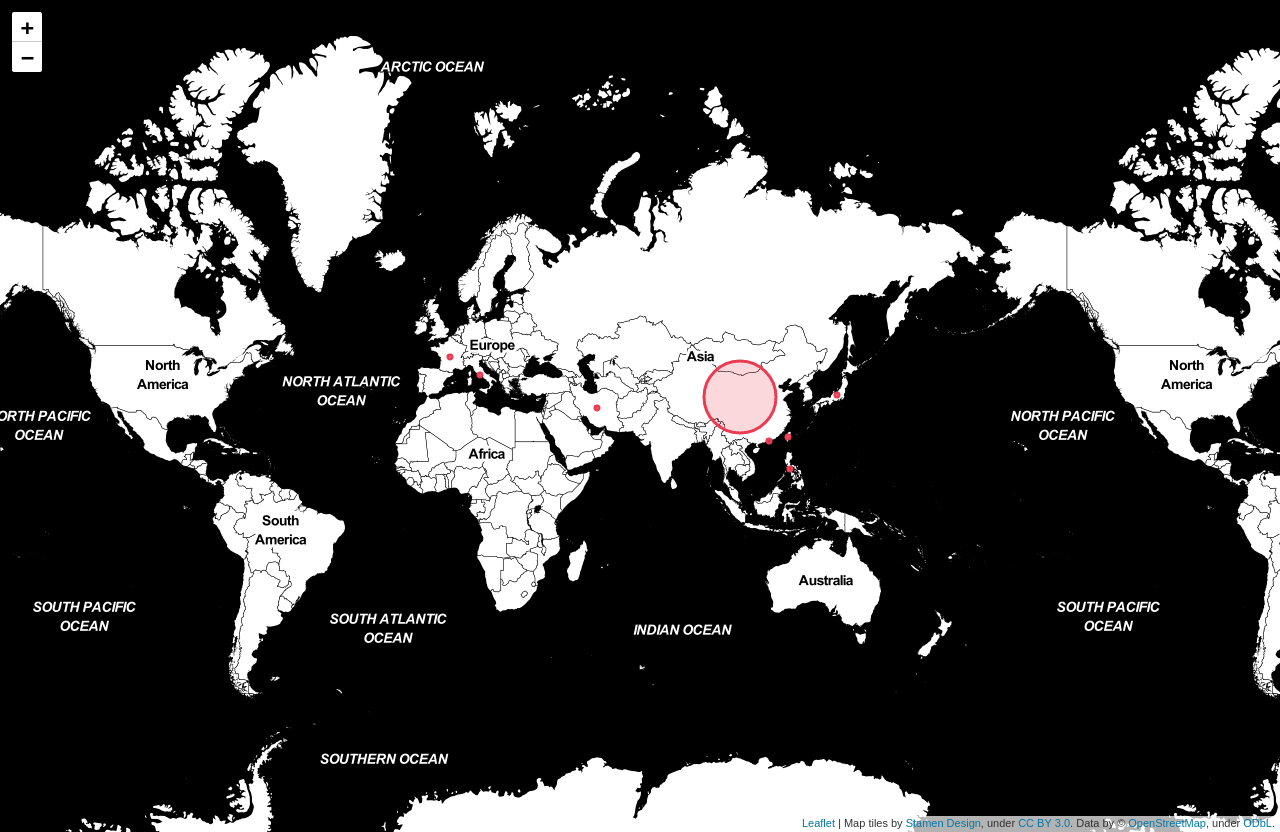

In [39]:
# Total Deaths in the world by Coronavirus

from IPython.display import Image
Image("./totalDeaths.png")

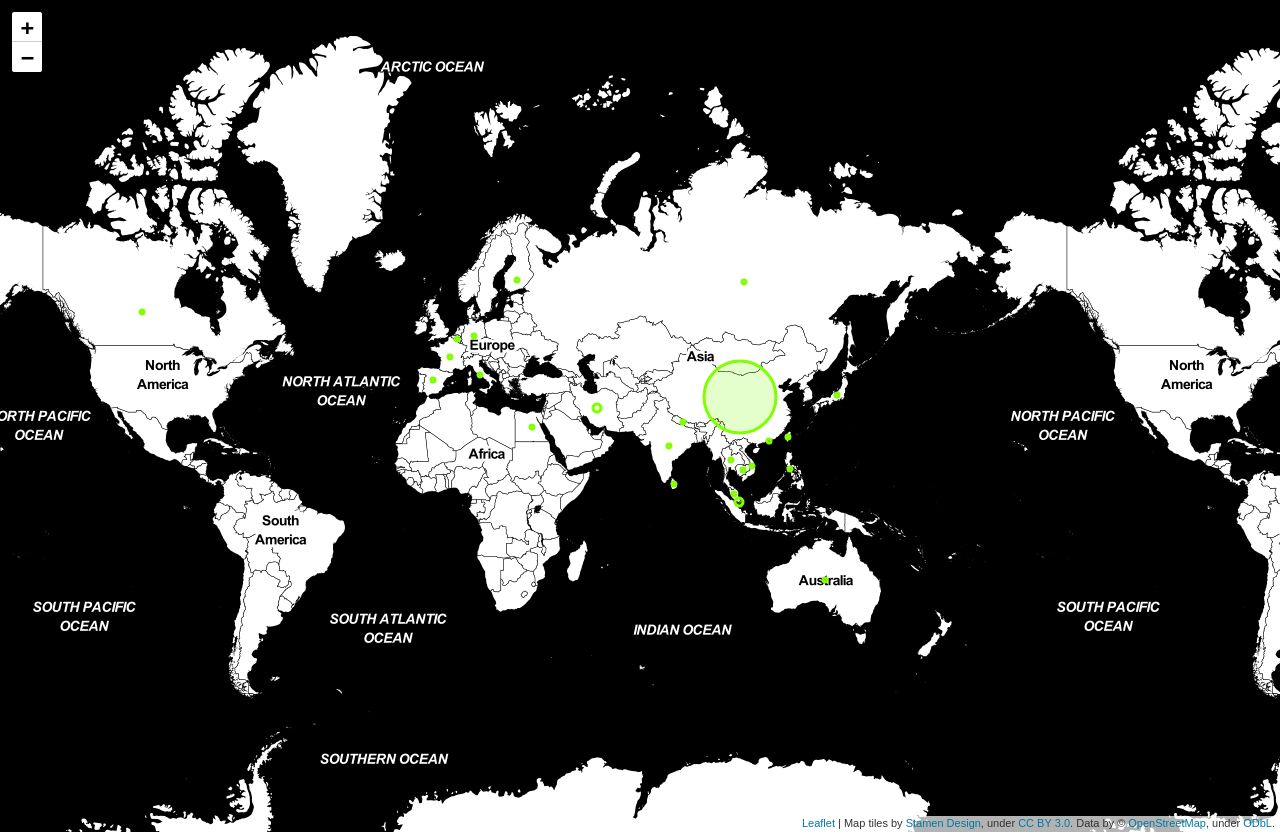

In [40]:
# Total Recovered Cases in the world from coronavirus

from IPython.display import Image
Image("./totalRecovered.png")